<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/week2_%E6%8E%88%E6%A5%AD%E8%AA%B2%E9%A1%8C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

In [3]:
import pandas as pd 
data= pd.read_csv('drive/My Drive/mtfuji_data.csv')

In [4]:

ndarray=np.array(data)
print(ndarray)

[[0.00000000e+00 3.51341410e+01 1.39132082e+02 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 3.51358260e+01 1.39129202e+02 0.00000000e+00
  3.22000000e+02]
 [2.00000000e+00 3.51375100e+01 1.39126322e+02 0.00000000e+00
  6.44000000e+02]
 ...
 [2.97000000e+02 3.56312840e+01 1.38271368e+02 1.97399000e+03
  9.56980000e+04]
 [2.98000000e+02 3.56329470e+01 1.38268452e+02 1.84136000e+03
  9.60200000e+04]
 [2.99000000e+02 3.56346100e+01 1.38265536e+02 1.72580000e+03
  9.63430000e+04]]


問題1　断面図の作成

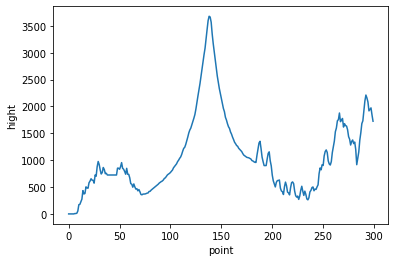

In [22]:
y=ndarray[0:,3:4]
#print(elevation)

x=ndarray[0:,0:1]

import matplotlib.pyplot as plt


plt.xlabel('point')
plt.ylabel('hight')
plt.plot(x,y)

問題2 ある地点の勾配を計算する関数の作成

In [6]:
def slope(now_point):
  x_slope1=x[now_point]
  x_slope2=x[now_point+1]

  y_slope1=y[now_point]
  y_slope2=y[now_point+1]

  #x,yの差分算出
  dif_x=x_slope1-x_slope2
  dif_y=y_slope1-y_slope2

  dv=dif_y/dif_x
  return (dv[0],dif_x[0])

問題3 移動先の地点を計算する関数を作成

In [9]:
def next_point(now_point):
  a=0.2
  #移動先の高さを算出
  y_df,x_df=slope(now_point)
  nx_point_y=y[now_point]-a*y_df
  #移動先の地点を算出
  nx_point_x=now_point+x_df
  return (round(nx_point_y[0]),round(nx_point_x))

print(next_point(136))

(3401, 135)


問題4 山を下る関数を作成

In [15]:
def go_to(now_point):

  y_list=[y[now_point]] #初期値設定
  x_list=[now_point] #初期値設定
  isTrue=True
 
  #下山
  while isTrue:
    num_y,num_x=next_point(now_point)
    y_list.append(num_y) #一歩下山した高さ
    x_list.append(num_x) #一歩下山した地点
    
    if y_list[-1]==y_list[-2]:
      isTrue=False
    else:
      now_point=num_x
  return (y_list,x_list)  

print(go_to(136))

([array([3434.59]), 3401, 3233, 3052, 2944, 2797, 2679, 2535, 2399, 2283, 2174, 2052, 1929, 1829, 1768, 1715, 1646, 1586, 1555, 1496, 1414, 1346, 1279, 1229, 1216, 1156, 1094, 1050, 1029, 993, 968, 925, 906, 879, 854, 809, 791, 768, 750, 739, 723, 695, 667, 658, 626, 609, 600, 586, 572, 549, 533, 516, 502, 485, 469, 456, 440, 416, 418, 384, 386, 376, 370, 371, 368, 353, 364, 422, 463, 425, 478, 461, 511, 569, 485, 563, 566, 694, 749, 739, 871, 717, 800, 840, 853, 976, 866, 821, 855, 852, 699, 724, 724], [136, 135, 134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44])


問題5 下山過程の可視化

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


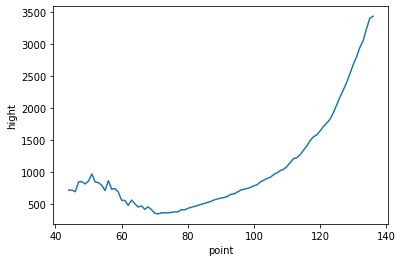

In [21]:
hight,point=go_to(136)

plt.xlabel('point')
plt.ylabel('hight')
plt.plot(point,hight)



問題6 初期値の変更

In [45]:
def set_initial_num():
  """
  全初期値を生成して下山過程を取得
  """
  ini_num=[]
  height_list=[]
  point_list=[]
  for i in x[:,0]-1:
    height,point=go_to(int(i))
    height_list.append(height)
    point_list.append(point)
  return (height_list, point_list)

h_list,p_list=set_initial_num()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


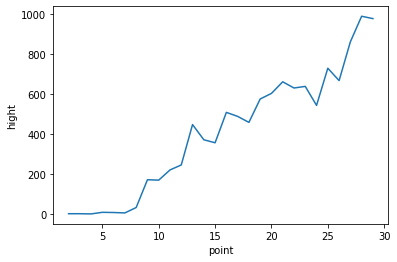

In [50]:
plt.xlabel('point')
plt.ylabel('hight')
plt.plot(p_list[30],h_list[30]) #例グラフ1


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


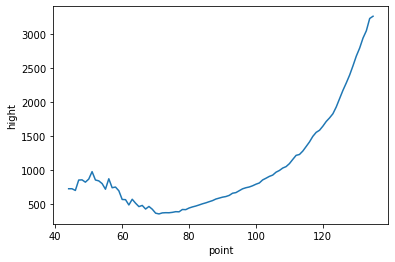

In [51]:
plt.xlabel('point')
plt.ylabel('hight')
plt.plot(p_list[136],h_list[136])#例グラフ2

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


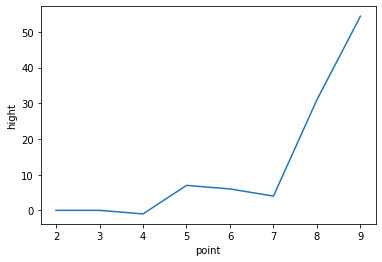

In [52]:
plt.xlabel('point')
plt.ylabel('hight')
plt.plot(p_list[10],h_list[10])#例グラフ3